In [1]:
import scvelo as scv

In [2]:
import sys
sys.executable

'/home/yuwang/miniconda3/bin/python3.9'

In [3]:
import scanpy as sc 
import cellrank as cr 
import numpy as np 
import pandas as pd 
import anndata as ad

In [5]:
adata = scv.read("neu.h5ad")

In [6]:
adata

AnnData object with n_obs × n_vars = 957 × 17021
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'pANN_0.25_0.005_1835', 'DF.classifications_0.25_0.005_1835', 'celltype', 'pANN_0.25_0.005_665', 'DF.classifications_0.25_0.005_665', 'pANN_0.25_0.005_1011', 'DF.classifications_0.25_0.005_1011', 'merge_celltype', 'RNA_snn_res.0.05', 'RNA_snn_res.0.01'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_umap_harmony'
    varm: 'HARMONY', 'PCs'
    obsp: 'distances'

In [7]:
adata.obs.index

Index(['100d_AACAAGACAAGCGCAA-1_1', '100d_AACCCAAAGAATTGCA-1_1',
       '100d_AACGAAACAGTTGAAA-1_1', '100d_AAGACAATCTTTGATC-1_1',
       '100d_AAGGAATCAAGATCCT-1_1', '100d_AAGTGAACATTGTGCA-1_1',
       '100d_AATGCCAGTCTGATAC-1_1', '100d_ACAAAGAGTACCGCGT-1_1',
       '100d_ACGTAACGTTCCGTTC-1_1', '100d_ACTCCCACATGATAGA-1_1',
       ...
       '200d_TTTACGTGTTGCATCA-1', '200d_TTTACTGTCACCTGTC-1',
       '200d_TTTAGTCTCACGGGCT-1', '200d_TTTATGCGTACCCACG-1',
       '200d_TTTCATGTCGGAAACG-1', '200d_TTTCCTCGTAGTCGGA-1',
       '200d_TTTCCTCGTGAATGTA-1', '200d_TTTCCTCTCGGCACTG-1',
       '200d_TTTGACTTCGAGAAAT-1', '200d_TTTGGAGAGTACCCTA-1'],
      dtype='object', length=957)

In [8]:
barcodes = adata.obs.index.tolist()
barcodes = [bc[0:23] for bc in barcodes]
adata.obs.index = barcodes 

In [9]:
adata.obs.index

Index(['100d_AACAAGACAAGCGCAA-1', '100d_AACCCAAAGAATTGCA-1',
       '100d_AACGAAACAGTTGAAA-1', '100d_AAGACAATCTTTGATC-1',
       '100d_AAGGAATCAAGATCCT-1', '100d_AAGTGAACATTGTGCA-1',
       '100d_AATGCCAGTCTGATAC-1', '100d_ACAAAGAGTACCGCGT-1',
       '100d_ACGTAACGTTCCGTTC-1', '100d_ACTCCCACATGATAGA-1',
       ...
       '200d_TTTACGTGTTGCATCA-1', '200d_TTTACTGTCACCTGTC-1',
       '200d_TTTAGTCTCACGGGCT-1', '200d_TTTATGCGTACCCACG-1',
       '200d_TTTCATGTCGGAAACG-1', '200d_TTTCCTCGTAGTCGGA-1',
       '200d_TTTCCTCGTGAATGTA-1', '200d_TTTCCTCTCGGCACTG-1',
       '200d_TTTGACTTCGAGAAAT-1', '200d_TTTGGAGAGTACCCTA-1'],
      dtype='object', length=957)

In [10]:
ldata1 =scv.read('/home/yuwang/yxx/repeat_scRNA/01_merge/fib/velocyto/ensembl_repeat/obj1.loom',cache=True)
ldata2 =scv.read('/home/yuwang/yxx/repeat_scRNA/01_merge/fib/velocyto/ensembl_repeat/obj2.loom',cache=True)
ldata3 =scv.read('/home/yuwang/yxx/repeat_scRNA/01_merge/fib/velocyto/ensembl_repeat/obj3.loom',cache=True)

/home/yuwang/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yuwang/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/yuwang/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [11]:
barcodes = [bc.split(':')[1] for bc in ldata1.obs.index.tolist()] 
barcodes = ['100d_' + bc[0:len(bc)-1] + '-1' for bc in barcodes] 
ldata1.obs.index = barcodes 

In [12]:
ldata1.obs.index

Index(['100d_AAACGCTCACCACATA-1', '100d_AAAGGGCTCACTTTGT-1',
       '100d_AAACGCTCAAGCGGAT-1', '100d_AAACGCTGTGGCTCTG-1',
       '100d_AAACCCATCCTACGGG-1', '100d_AAACCCAGTCTGTGGC-1',
       '100d_AAAGGTAGTGTCCATA-1', '100d_AAAGGTAAGAAATTCG-1',
       '100d_AAAGGGCGTCCTACAA-1', '100d_AAAGGATGTTCCGTTC-1',
       ...
       '100d_TTTGTTGTCACTGGTA-1', '100d_TTTGGAGCAAAGGGCT-1',
       '100d_TTTGGAGTCTCTGCTG-1', '100d_TTTGATCCACGGGTAA-1',
       '100d_TTTGACTAGGTGGTTG-1', '100d_TTTGGAGAGGCTTAGG-1',
       '100d_TTTGACTTCAGAGTGG-1', '100d_TTTGATCCACTTTAGG-1',
       '100d_TTTGATCGTTCATCTT-1', '100d_TTTGACTTCGGACAAG-1'],
      dtype='object', length=13770)

In [13]:
barcodes = [bc.split(':')[1] for bc in ldata2.obs.index.tolist()] 
barcodes = ['150d_' + bc[0:len(bc)-1] + '-1' for bc in barcodes] 
ldata2.obs.index = barcodes 

In [14]:
barcodes = [bc.split(':')[1] for bc in ldata3.obs.index.tolist()] 
barcodes = ['200d_' + bc[0:len(bc)-1] + '-1' for bc in barcodes] 
ldata3.obs.index = barcodes 

In [15]:
ldata1.var_names_make_unique() 
ldata2.var_names_make_unique() 
ldata3.var_names_make_unique()

In [16]:
ldata = ldata1.concatenate([ldata2,ldata3])

In [17]:
ldata.obs.index

Index(['100d_AAACGCTCACCACATA-1-0', '100d_AAAGGGCTCACTTTGT-1-0',
       '100d_AAACGCTCAAGCGGAT-1-0', '100d_AAACGCTGTGGCTCTG-1-0',
       '100d_AAACCCATCCTACGGG-1-0', '100d_AAACCCAGTCTGTGGC-1-0',
       '100d_AAAGGTAGTGTCCATA-1-0', '100d_AAAGGTAAGAAATTCG-1-0',
       '100d_AAAGGGCGTCCTACAA-1-0', '100d_AAAGGATGTTCCGTTC-1-0',
       ...
       '200d_TTTGGAGCAGTTCACA-1-2', '200d_TTTGTTGGTAGATGTA-1-2',
       '200d_TTTGGAGGTGTCACAT-1-2', '200d_TTTGGAGTCGACATCA-1-2',
       '200d_TTTGTTGTCCCGAATA-1-2', '200d_TTTGGAGGTGCCGGTT-1-2',
       '200d_TTTGGTTTCCTATGGA-1-2', '200d_TTTGGAGTCTCGGTAA-1-2',
       '200d_TTTGTTGCAAGCGCTC-1-2', '200d_TTTGGTTTCATAAGGA-1-2'],
      dtype='object', length=39619)

In [18]:
barcodes = ldata.obs.index.tolist()
barcodes = [bc[0:23] for bc in barcodes]
ldata.obs.index = barcodes 

In [19]:
ldata.obs.index

Index(['100d_AAACGCTCACCACATA-1', '100d_AAAGGGCTCACTTTGT-1',
       '100d_AAACGCTCAAGCGGAT-1', '100d_AAACGCTGTGGCTCTG-1',
       '100d_AAACCCATCCTACGGG-1', '100d_AAACCCAGTCTGTGGC-1',
       '100d_AAAGGTAGTGTCCATA-1', '100d_AAAGGTAAGAAATTCG-1',
       '100d_AAAGGGCGTCCTACAA-1', '100d_AAAGGATGTTCCGTTC-1',
       ...
       '200d_TTTGGAGCAGTTCACA-1', '200d_TTTGTTGGTAGATGTA-1',
       '200d_TTTGGAGGTGTCACAT-1', '200d_TTTGGAGTCGACATCA-1',
       '200d_TTTGTTGTCCCGAATA-1', '200d_TTTGGAGGTGCCGGTT-1',
       '200d_TTTGGTTTCCTATGGA-1', '200d_TTTGGAGTCTCGGTAA-1',
       '200d_TTTGTTGCAAGCGCTC-1', '200d_TTTGGTTTCATAAGGA-1'],
      dtype='object', length=39619)

In [20]:
adata = scv.utils.merge(adata, ldata)

In [21]:
adata.obs['celltype']=adata.obs['celltype'].astype('category').values

In [22]:
adata.obs['celltype']

100d_AACAAGACAAGCGCAA-1    1
100d_AACCCAAAGAATTGCA-1    1
100d_AACGAAACAGTTGAAA-1    0
100d_AAGACAATCTTTGATC-1    1
100d_AAGGAATCAAGATCCT-1    0
                          ..
200d_TTTCCTCGTAGTCGGA-1    0
200d_TTTCCTCGTGAATGTA-1    1
200d_TTTCCTCTCGGCACTG-1    0
200d_TTTGACTTCGAGAAAT-1    0
200d_TTTGGAGAGTACCCTA-1    1
Name: celltype, Length: 957, dtype: category
Categories (3, int64): [0, 1, 2]

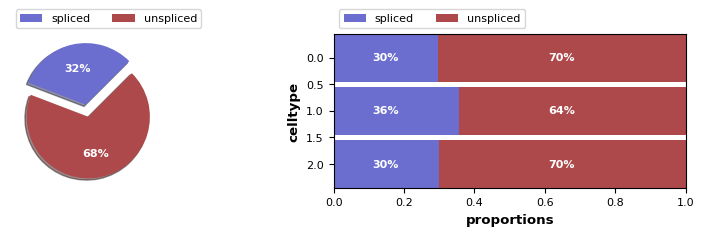

In [23]:
scv.pl.proportions(adata,groupby='celltype')

In [24]:
scv.pp.filter_and_normalize(adata) 
scv.pp.moments(adata)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:14) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [25]:
scv.tl.velocity(adata, mode='stochastic') 
scv.tl.velocity_graph(adata) 

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/160 cores)


  0%|          | 0/957 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/home/yuwang/miniconda3/lib/python3.9/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap_harmony', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_embedding.pdf


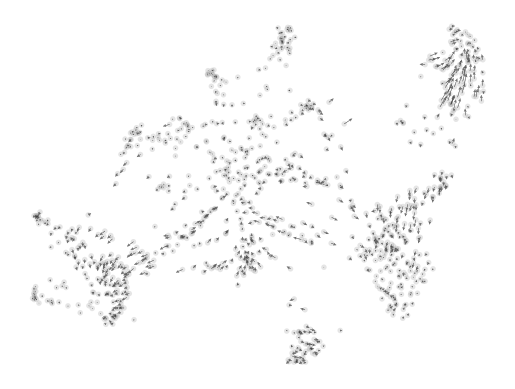

In [26]:
scv.pl.velocity_embedding(adata, basis='umap_harmony', frameon=False, save='embedding.pdf')

saving figure to file ./figures/scvelo_embedding_grid.pdf


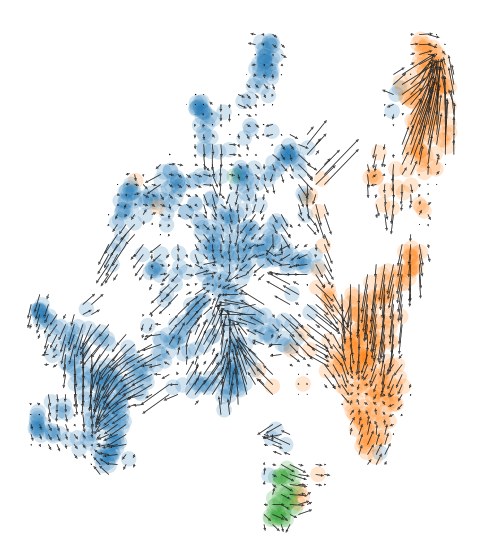

In [27]:
scv.pl.velocity_embedding_grid(adata, basis='umap_harmony', color='celltype', save='embedding_grid.pdf', title='', scale=0.25,figsize =(6,7))

saving figure to file ./figures/scvelo_embedding_stream.pdf


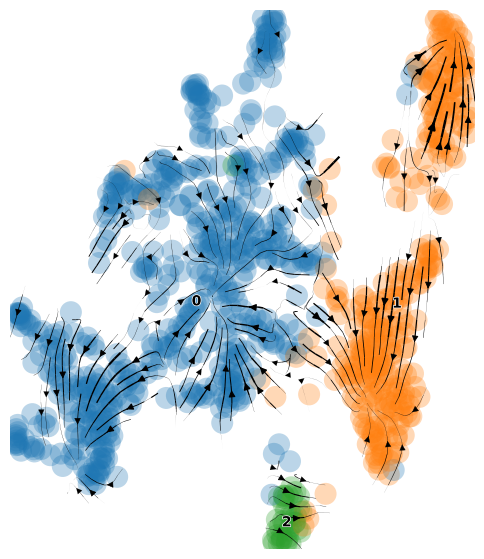

In [33]:
scv.pl.velocity_embedding_stream(adata, basis='umap_harmony', color=['celltype'], save='embedding_stream.pdf', title='',figsize =(6,7))

In [29]:
adata

AnnData object with n_obs × n_vars = 957 × 16967
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'pANN_0.25_0.005_1835', 'DF.classifications_0.25_0.005_1835', 'celltype', 'pANN_0.25_0.005_665', 'DF.classifications_0.25_0.005_665', 'pANN_0.25_0.005_1011', 'DF.classifications_0.25_0.005_1011', 'merge_celltype', 'RNA_snn_res.0.05', 'RNA_snn_res.0.01', 'Clusters', '_X', '_Y', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'neighbors', 'velocity_params', 'velocity